In [2]:
#Importamos la base
import pandas as pd

df = pd.read_csv('/content/stocolmo_inicial.csv')
display(df.head())

id                          listing_url       scrape_id last_scraped  \
0  142695  https://www.airbnb.com/rooms/142695  20250627030620   2025-06-27   
1  145320  https://www.airbnb.com/rooms/145320  20250627030620   2025-06-27   
2  164448  https://www.airbnb.com/rooms/164448  20250627030620   2025-06-28   
3  220851  https://www.airbnb.com/rooms/220851  20250627030620   2025-06-27   
4  238411  https://www.airbnb.com/rooms/238411  20250627030620   2025-06-27   

            source                                              name  \
0      city scrape  Family Friendly Sleek Colorful Designer Aparment   
1      city scrape            In the middle of it all - with a view!   
2      city scrape       Double room in central Stockholm with Wi-Fi   
3      city scrape                           One room in appartement   
4  previous scrape               Cozy apartment in central Stockholm   

                                         description  \
0  Experience a charming and stylish apartment lo...   
1  My place is good for couples, friends, and sol...   
2  I am renting out a nice double room on the top...   
3                                           Welcome!   
4                                                NaN   

                               neighborhood_overview  \
0        A calm hidden area close to the city centre   
1  The flat is in the area of Södermalm, the youn...   
2                                                NaN   
3  Many restaurangs wery close and walkingdistanc...   
4  Restaurants, cafés, museums, art galleries, pa...   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/hosting/Hosti...   333509  ...   
1  https://a0.muscache.com/pictures/9172a792-604c...   703851  ...   
2  https://a0.muscache.com/pictures/f56d8d10-a7fa...   784312  ...   
3  https://a0.muscache.com/pictures/2085606/7a706...   412283  ...   
4  https://a0.muscache.com/pictures/2806060/7fc68...  1250232  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        5.00                   4.00                5.00   
1                        4.94                   4.96                4.80   
2                        4.97                   4.84                4.76   
3                        4.88                   4.82                4.71   
4                        4.95                   4.85                4.64   

  license instant_bookable calculated_host_listings_count  \
0     NaN                f                              1   
1     NaN                f                              2   
2     NaN                f                              2   
3     NaN                f                              2   
4     NaN                f                              1   

  calculated_host_listings_count_entire_homes  \
0                                           1   
1                                           0   
2                                           0   
3                                           1   
4                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            2   
2                                            2   
3                                            1   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              1.00  
1                                           0              0.72  
2                                           0              2.60  
3                                           0              0.39  
4                                           0              0.67  

[5 rows x 79 columns]

In [3]:
# Ver cuántos nulos tiene cada columna
nulos = df.isnull().sum()
nulos = nulos[nulos > 0]

print(nulos)


description                      220
neighborhood_overview           3429
host_name                        198
host_since                       198
host_location                   1160
host_about                      3027
host_response_time              1721
host_response_rate              1721
host_acceptance_rate            1370
host_is_superhost                 29
host_thumbnail_url               198
host_picture_url                 198
host_neighbourhood              3907
host_listings_count              198
host_total_listings_count        198
host_verifications               198
host_has_profile_pic             198
host_identity_verified           198
neighbourhood                   3429
neighbourhood_group_cleansed    5315
bathrooms                       1528
bathrooms_text                    10
bedrooms                         248
beds                            1528
price                           1554
minimum_minimum_nights             1
maximum_minimum_nights             1
m

In [4]:
#Imputamos las que sean de texto como description o host_name con "No Information"
cols_texto_elegidas = [
    "name",
    "description",
    "neighborhood_overview",
    "host_name",
    "host_location",
    "host_about",
    "host_response_time",
    "host_response_rate",
    "host_acceptance_rate", "host_since",
    "host_thumbnail_url",
    "host_picture_url", "has_availability",
    "host_neighbourhood",
    "neighbourhood",
    "neighbourhood_cleansed",
    "property_type",
    "room_type",
    "bathrooms_text",
    "calendar_updated",
    "first_review",
    "last_review",
    "license", "host_is_superhost",
    "host_has_profile_pic",
    "host_identity_verified", "neighbourhood_group_cleansed", "host_verifications"
]

df[cols_texto_elegidas] = df[cols_texto_elegidas].fillna("No Information")

In [5]:
# Convertir columnas de fechas
cols_fechas = ["host_since", "first_review", "last_review"]

for col in cols_fechas:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")

# Verificar rangos de fechas
for col in cols_fechas:
    if col in df.columns:
        print(f"\nColumna: {col}")
        print("Mínima:", df[col].min())
        print("Máxima:", df[col].max())
        print("Nulos:", df[col].isnull().sum())



Columna: host_since
Mínima: 2008-11-21 00:00:00
Máxima: 2025-06-25 00:00:00
Nulos: 198

Columna: first_review
Mínima: 2011-07-30 00:00:00
Máxima: 2025-06-27 00:00:00
Nulos: 1146

Columna: last_review
Mínima: 2013-11-09 00:00:00
Máxima: 2025-06-29 00:00:00
Nulos: 1146


In [6]:
#Imputamos por mediana


# Columnas continuas de reviews
cols_reviews = [
    "review_scores_rating",
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "review_scores_value",
    "reviews_per_month", "host_listings_count", "host_total_listings_count"
]

# Imputar nulos con la mediana
for col in cols_reviews:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())



# Limpiamos símbolos de $ y comas en price y revenue
df["price"] = (
    df["price"]
    .astype(str)
    .str.replace("[$,]", "", regex=True)
    .astype(float)
)

df["estimated_revenue_l365d"] = (
    df["estimated_revenue_l365d"]
    .astype(str)
    .str.replace("[$,]", "", regex=True)
    .astype(float)
)

# Ahora imputamos las columnas con mediana
cols_mediana = [
    "bathrooms",
    "bedrooms",
    "beds",
    "price",
    "estimated_revenue_l365d",
    "minimum_minimum_nights",
    "maximum_minimum_nights",
    "minimum_maximum_nights",
    "maximum_maximum_nights"
]

for col in cols_mediana:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())



In [7]:
# Ver cuántos nulos tiene cada columna
nulos = df.isnull().sum()
nulos = nulos[nulos > 0]

print(nulos)

host_since       198
first_review    1146
last_review     1146
dtype: int64


Limpieza de Outliers

In [8]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

# Lista de columnas numéricas
cols_numericas = df.select_dtypes(include=['number']).columns.tolist()

# Dropdown para elegir columna
dropdown = widgets.Dropdown(
    options=cols_numericas,
    description='Columna:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# Botón para imputar outliers
button = widgets.Button(
    description="Imputar outliers con mediana",
    button_style='warning'
)

output = widgets.Output()

def mostrar_boxplot(col):
    with output:
        output.clear_output()
        # Mostrar boxplot
        plt.figure(figsize=(6,4))
        df.boxplot(column=col)
        plt.title(f"Boxplot de {col}")
        plt.show()

        # Estadísticas
        media = df[col].mean()
        std = df[col].std()
        limite_inf = media - 3*std
        limite_sup = media + 3*std
        outliers = ((df[col] < limite_inf) | (df[col] > limite_sup)).sum()
        print(f"Media: {media:.2f}, Std: {std:.2f}")
        print(f"Límite inferior: {limite_inf:.2f}, Límite superior: {limite_sup:.2f}")
        print(f"Outliers detectados: {outliers}")

def on_dropdown_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        mostrar_boxplot(change['new'])

def on_button_click(b):
    col = dropdown.value
    media = df[col].mean()
    std = df[col].std()
    limite_inf = media - 3*std
    limite_sup = media + 3*std
    mediana = df[col].median()

    # Reemplazar outliers por mediana
    df.loc[(df[col] < limite_inf) | (df[col] > limite_sup), col] = mediana
    with output:
        print(f"\nOutliers de '{col}' imputados con la mediana ({mediana}).")
    mostrar_boxplot(col)

dropdown.observe(on_dropdown_change)
button.on_click(on_button_click)

display(dropdown, button, output)

# Mostrar primero la primera columna por defecto
mostrar_boxplot(cols_numericas[0])


Dropdown(description='Columna:', layout=Layout(width='50%'), options=('id', 'scrape_id', 'host_id', 'host_list…

Button(button_style='warning', description='Imputar outliers con mediana', style=ButtonStyle())

Output()

In [9]:
import numpy as np

# Seleccionar solo las columnas numéricas
num_cols = df.select_dtypes(include=[np.number]).columns

# Función para eliminar outliers por desviación estándar
def remove_outliers_std(df, cols, threshold=3):
    df_clean = df.copy()
    for col in cols:
        mean = df[col].mean()
        std = df[col].std()
        limit_low = mean - threshold * std
        limit_high = mean + threshold * std
        df_clean = df_clean[(df_clean[col] >= limit_low) & (df_clean[col] <= limit_high)]
    return df_clean

# Aplicar a todo el dataset numérico
df_clean = remove_outliers_std(df, num_cols, threshold=3)

print("Tamaño original:", df.shape)
print("Tamaño sin outliers:", df_clean.shape)

Tamaño original: (5315, 79)
Tamaño sin outliers: (4161, 79)


In [10]:
#Definimos los 6 pares de variables
pairs = [
    ("host_acceptance_rate", "host_response_rate"),
    ("review_scores_rating", "calculated_host_listings_count"),
    ("host_acceptance_rate", "price"),
    ("availability_365", "number_of_reviews"),
    ("host_acceptance_rate", "number_of_reviews"),
    ("reviews_per_month", "review_scores_communication")
]

In [11]:
#Filtramos los 4 tipos de habitación
room_types = ["Entire home/apt", "Private room", "Shared room", "Hotel room"]

In [12]:
cols_porcentaje = ["host_acceptance_rate", "host_response_rate"]

for col in cols_porcentaje:
    if col in df_clean.columns:
        df_clean[col] = (
            df_clean[col]
            .astype(str)
            .str.replace("%", "", regex=True)  # quitamos el símbolo %
            .replace("No Information", np.nan) # por si quedó tu etiqueta
            .astype(float)
        )

In [13]:
for col in cols_porcentaje:
    print(col, df_clean[col].dtype, df_clean[col].unique()[:10])


host_acceptance_rate float64 [ 83.  35.   0. 100.  13.  43.  69.  73.  nan  40.]
host_response_rate float64 [ 80.   0. 100.  nan  57.  75.  56.  83.  33.  60.]



=== Entire home/apt ===


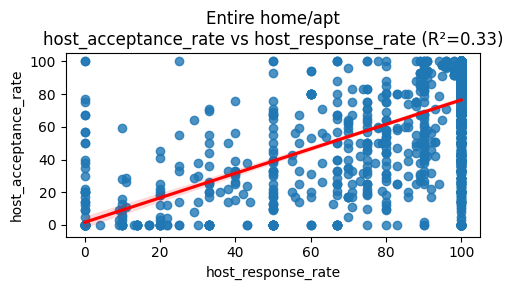

host_acceptance_rate vs host_response_rate → R²=0.331


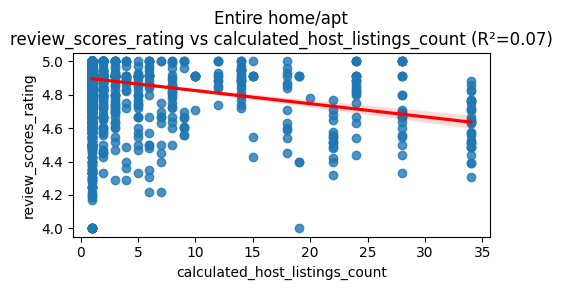

review_scores_rating vs calculated_host_listings_count → R²=0.068


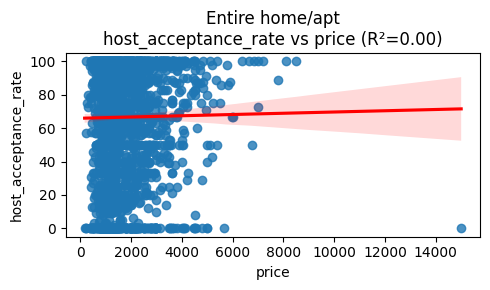

host_acceptance_rate vs price → R²=0.000


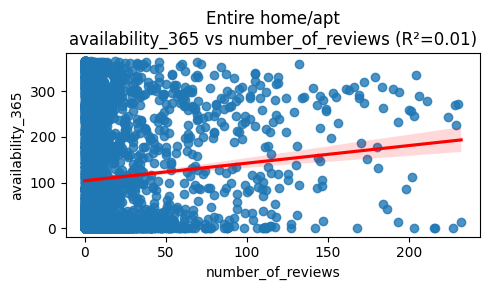

availability_365 vs number_of_reviews → R²=0.009


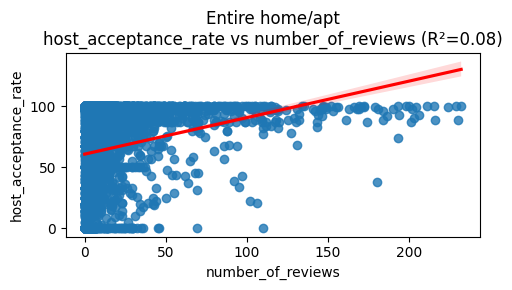

host_acceptance_rate vs number_of_reviews → R²=0.080


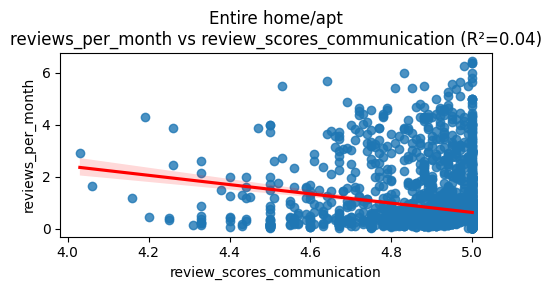

reviews_per_month vs review_scores_communication → R²=0.044

=== Private room ===


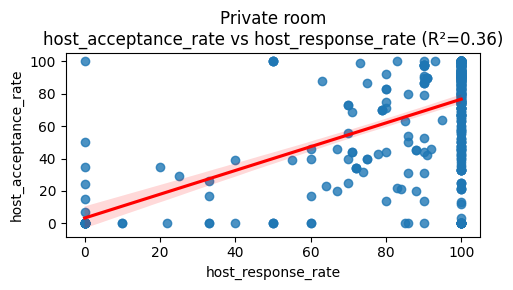

host_acceptance_rate vs host_response_rate → R²=0.364


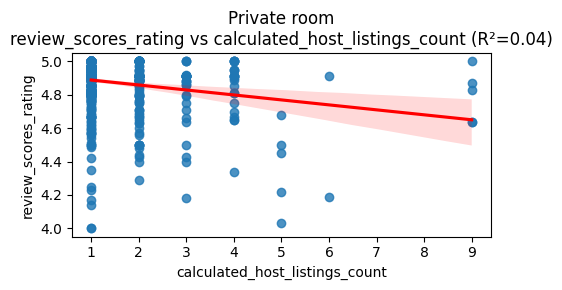

review_scores_rating vs calculated_host_listings_count → R²=0.040


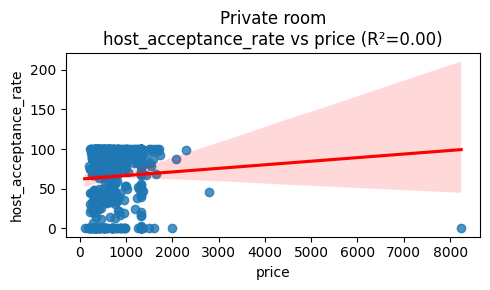

host_acceptance_rate vs price → R²=0.005


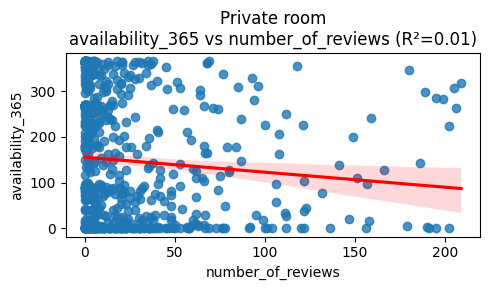

availability_365 vs number_of_reviews → R²=0.009


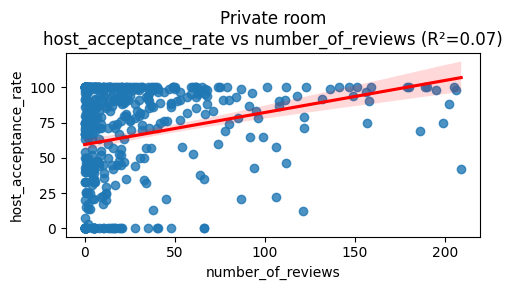

host_acceptance_rate vs number_of_reviews → R²=0.068


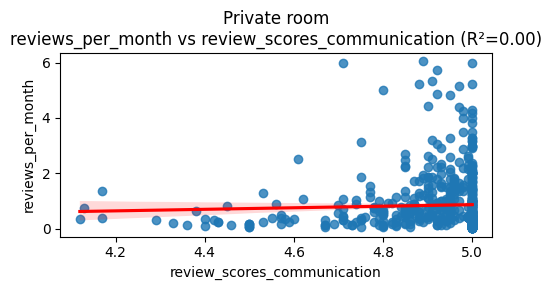

reviews_per_month vs review_scores_communication → R²=0.001

=== Shared room ===

=== Hotel room ===


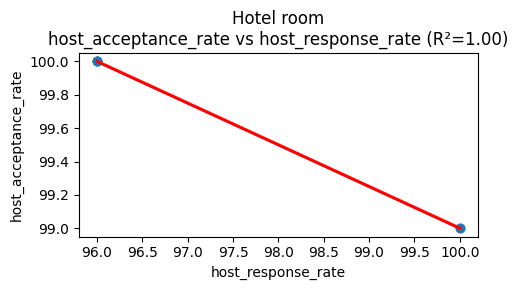

host_acceptance_rate vs host_response_rate → R²=1.000


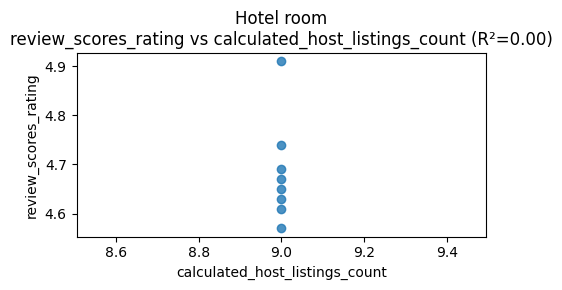

review_scores_rating vs calculated_host_listings_count → R²=0.000


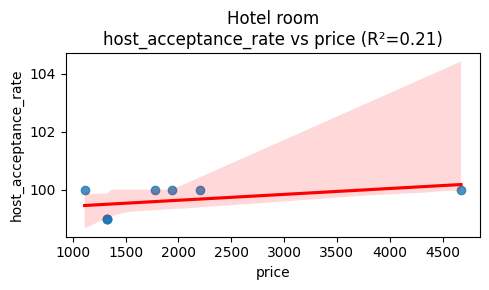

host_acceptance_rate vs price → R²=0.207


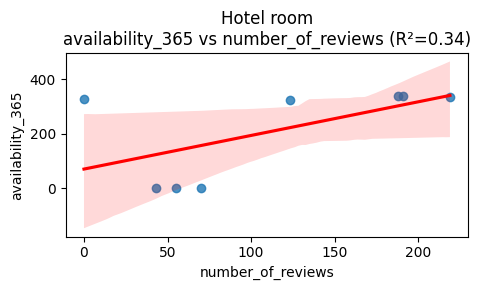

availability_365 vs number_of_reviews → R²=0.335


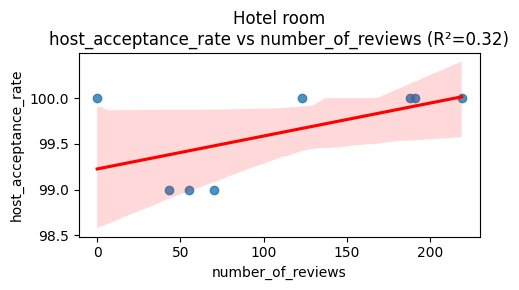

host_acceptance_rate vs number_of_reviews → R²=0.318


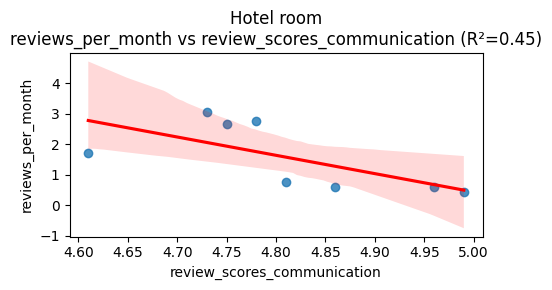

reviews_per_month vs review_scores_communication → R²=0.453


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Iterar por tipo de habitación y par de variables
for room in room_types:
    subset = df_clean[df_clean["room_type"] == room]
    print(f"\n=== {room} ===")

    for y_var, x_var in pairs:
        data = subset[[x_var, y_var]].dropna()

        if len(data) > 0:
            X = data[[x_var]]
            y = data[y_var]

            model = LinearRegression()
            model.fit(X, y)
            y_pred = model.predict(X)

            r2 = r2_score(y, y_pred)

            plt.figure(figsize=(5,3))
            sns.regplot(x=x_var, y=y_var, data=data, line_kws={"color":"red"})
            plt.title(f"{room}\n{y_var} vs {x_var} (R²={r2:.2f})")
            plt.tight_layout()
            plt.show()

            print(f"{y_var} vs {x_var} → R²={r2:.3f}")


In [15]:
# Nota metodológica:
# En los tipos de habitación "Shared room" y "Hotel room" se detectó una muestra insuficiente
# después del proceso de limpieza de datos y eliminación de outliers.
# Por rigor estadístico, se decidió no forzar la generación de regresiones
# cuando el número de observaciones válidas es menor a 5,
# evitando así resultados no representativos o distorsionados.

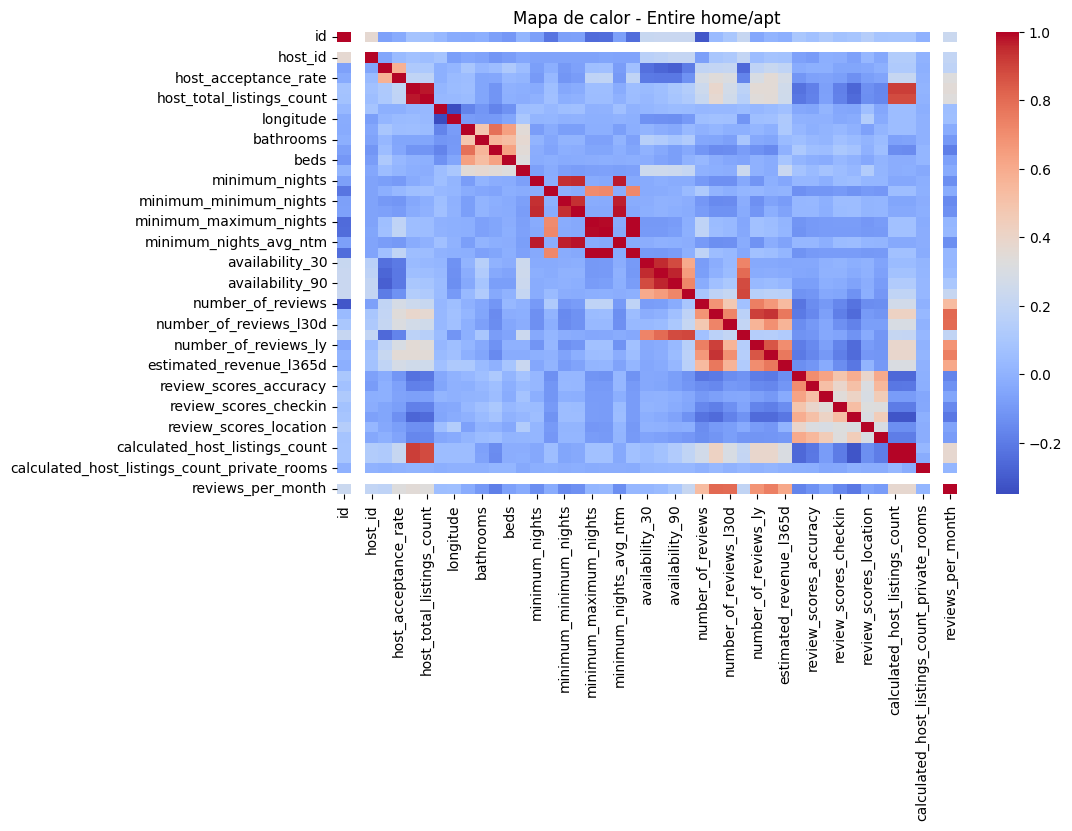


Top 10 correlaciones - Entire home/apt
calculated_host_listings_count               calculated_host_listings_count_entire_homes    0.998893
calculated_host_listings_count_entire_homes  calculated_host_listings_count                 0.998893
maximum_maximum_nights                       maximum_nights_avg_ntm                         0.998712
maximum_nights_avg_ntm                       maximum_maximum_nights                         0.998712
                                             minimum_maximum_nights                         0.996521
minimum_maximum_nights                       maximum_nights_avg_ntm                         0.996521
                                             maximum_maximum_nights                         0.991759
maximum_maximum_nights                       minimum_maximum_nights                         0.991759
minimum_nights_avg_ntm                       maximum_minimum_nights                         0.979223
maximum_minimum_nights                       minimu

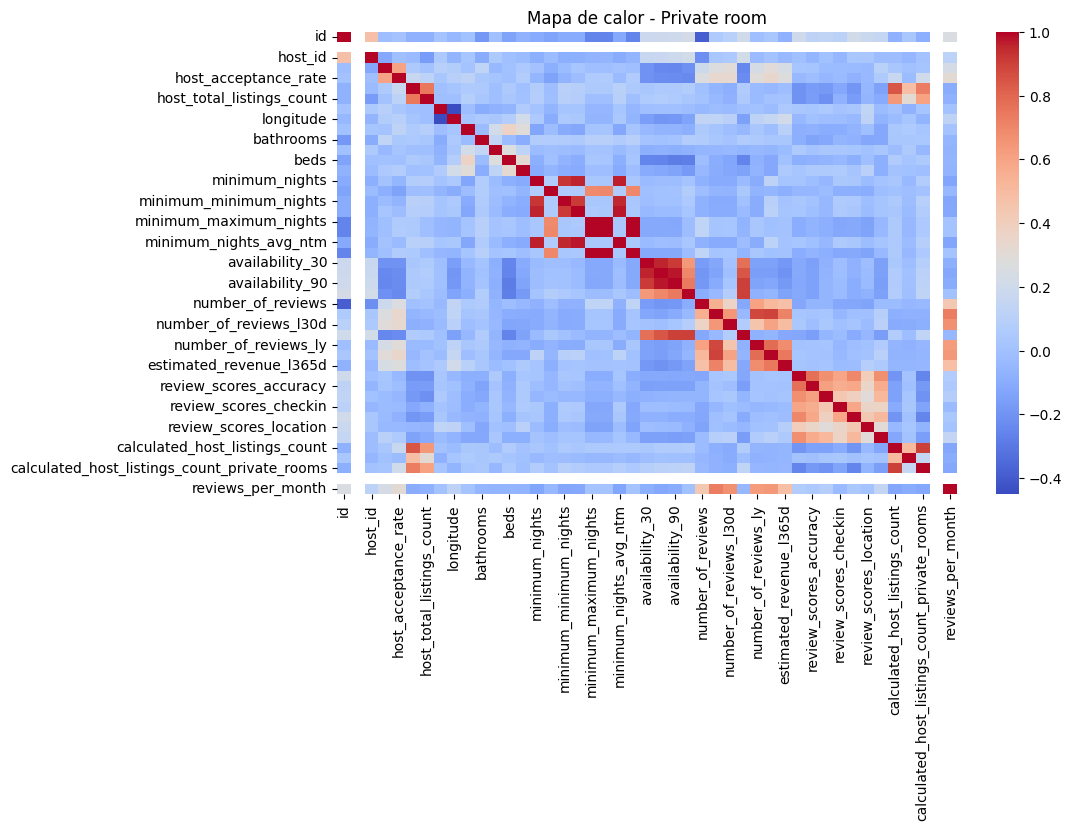


Top 10 correlaciones - Private room
maximum_maximum_nights  maximum_nights_avg_ntm    0.999807
maximum_nights_avg_ntm  maximum_maximum_nights    0.999807
                        minimum_maximum_nights    0.996570
minimum_maximum_nights  maximum_nights_avg_ntm    0.996570
                        maximum_maximum_nights    0.994757
maximum_maximum_nights  minimum_maximum_nights    0.994757
maximum_minimum_nights  minimum_nights_avg_ntm    0.976944
minimum_nights_avg_ntm  maximum_minimum_nights    0.976944
availability_60         availability_90           0.971905
availability_90         availability_60           0.971905
dtype: float64


/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


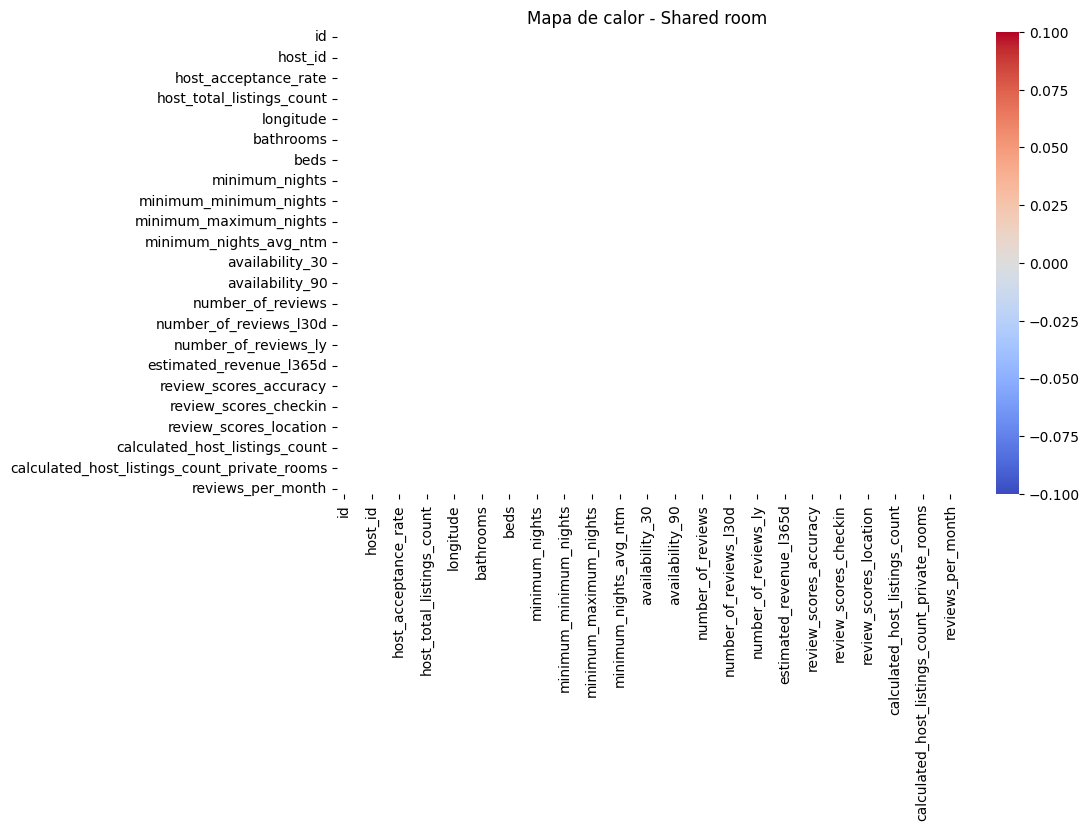


Top 10 correlaciones - Shared room
Series([], dtype: float64)


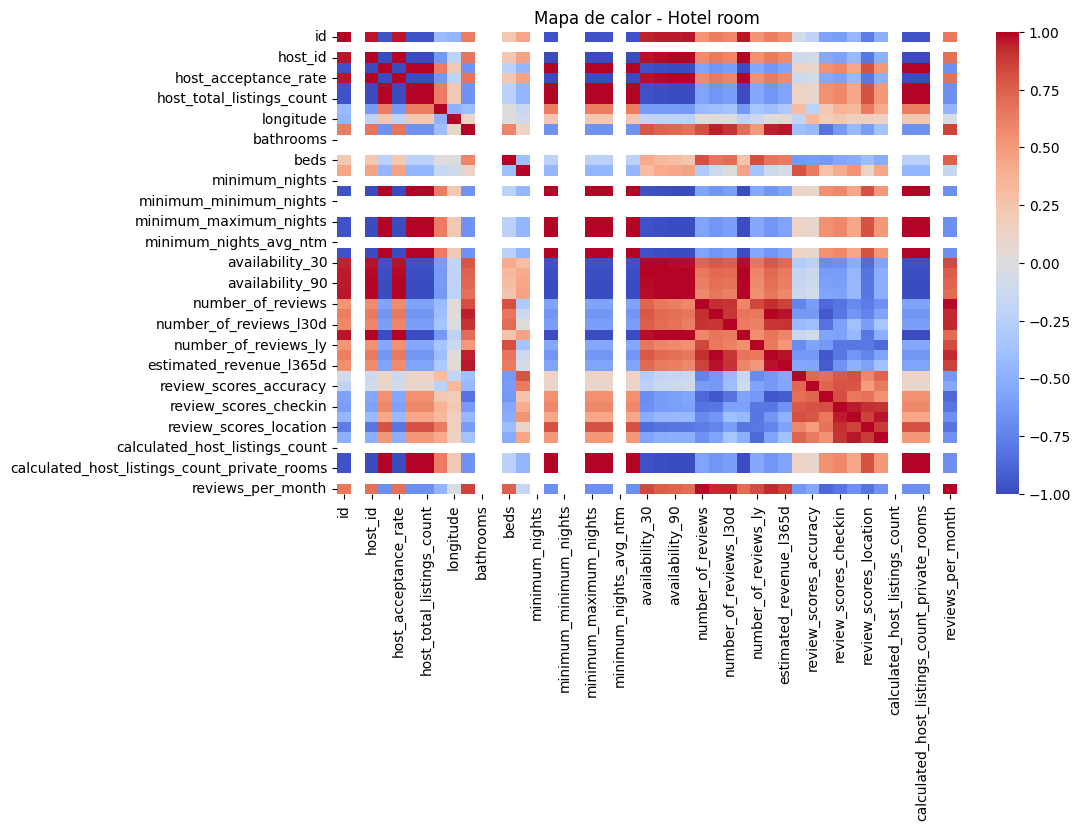


Top 10 correlaciones - Hotel room
calculated_host_listings_count_entire_homes  host_listings_count                            1.0
host_response_rate                           host_total_listings_count                      1.0
host_total_listings_count                    host_response_rate                             1.0
host_listings_count                          calculated_host_listings_count_entire_homes    1.0
                                             host_response_rate                             1.0
host_total_listings_count                    calculated_host_listings_count_entire_homes    1.0
calculated_host_listings_count_entire_homes  host_total_listings_count                      1.0
host_response_rate                           host_listings_count                            1.0
host_listings_count                          host_id                                        1.0
host_response_rate                           calculated_host_listings_count_entire_homes    1.0
dtype

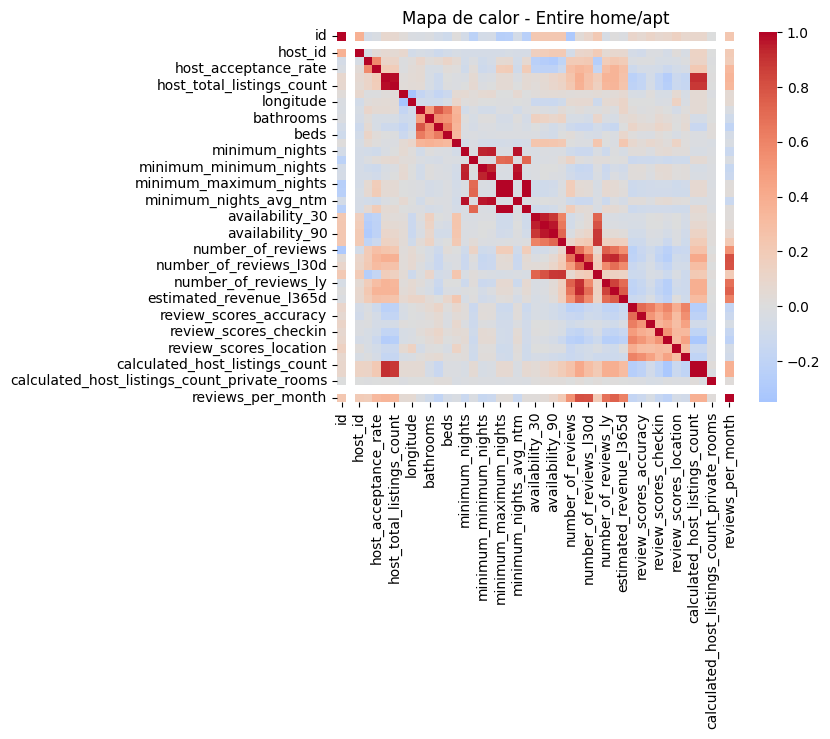

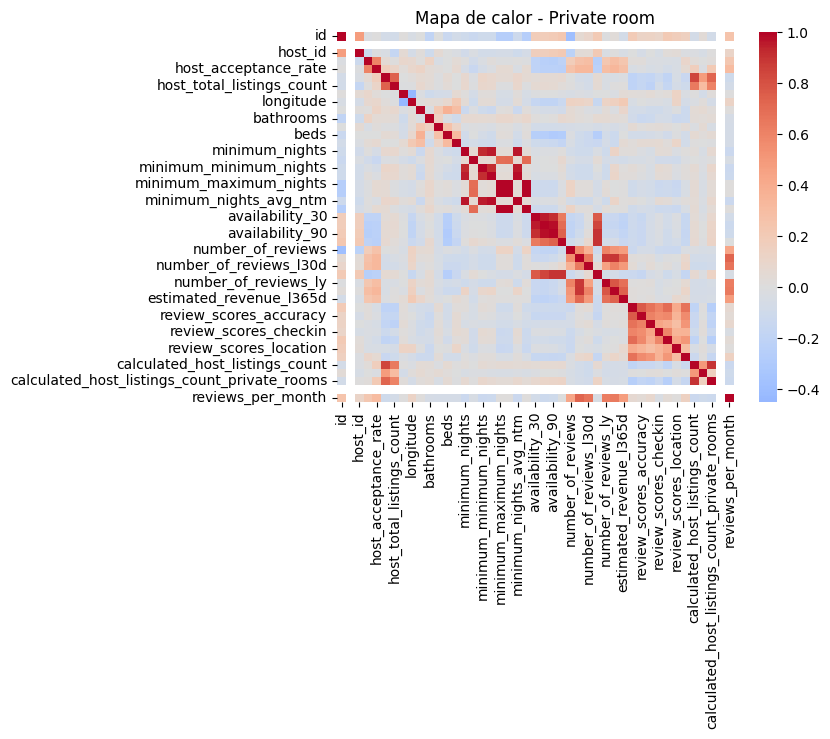

Shared room: no hay suficientes datos para generar correlaciones confiables.
Hotel room: no hay suficientes datos para generar correlaciones confiables.


In [16]:


# Mapa de calor por tipo de habitación
for room in room_types:
    subset = df_clean[df_clean["room_type"] == room]
    corr = subset.select_dtypes("number").corr()

    plt.figure(figsize=(10,6))
    sns.heatmap(corr, cmap="coolwarm")
    plt.title(f"Mapa de calor - {room}")
    plt.show()

    # 10 correlaciones más altas
    corr_abs = corr.abs().unstack().sort_values(ascending=False)
    top10 = corr_abs[(corr_abs < 1)].head(10)
    print(f"\nTop 10 correlaciones - {room}")
    print(top10)


for room in room_types:
    subset = df_clean[df_clean["room_type"] == room]
    if len(subset) < 50:
        print(f"{room}: no hay suficientes datos para generar correlaciones confiables.")
    else:
        corr = subset.select_dtypes("number").corr()
        sns.heatmap(corr, cmap="coolwarm", center=0)
        plt.title(f"Mapa de calor - {room}")
        plt.show()


In [17]:
df_clean["room_type"].value_counts()


room_type
Entire home/apt    3497
Private room        656
Hotel room            8
Name: count, dtype: int64

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Variables cuantitativas de interés según las instrucciones del profesor
variables_objetivo = [
    "review_scores_rating",
    "host_acceptance_rate",
    "host_is_superhost",
    "host_total_listings_count",
    "accommodates",
    "bedrooms",
    "price",
    "review_scores_value",
    "bathrooms",
    "reviews_per_month"
]

# Filtrar solo columnas numéricas
num_cols = df_clean.select_dtypes(include=[np.number]).columns


In [21]:
resultados = []

for target in variables_objetivo:
    if target not in df_clean.columns:
        print(f"⚠️ '{target}' no está en el DataFrame, se omite.")
        continue

    # Convert 'host_is_superhost' to numeric before selecting independent variables
    if 'host_is_superhost' in df_clean.columns:
        df_clean['host_is_superhost'] = df_clean['host_is_superhost'].replace({'t': 1, 'f': 0})
        # Ensure it's treated as a number
        df_clean['host_is_superhost'] = pd.to_numeric(df_clean['host_is_superhost'], errors='coerce')


    # Variables independientes (todas numéricas excepto la target)
    num_cols_updated = df_clean.select_dtypes(include=[np.number]).columns
    X = df_clean[num_cols_updated].drop(columns=[target], errors='ignore')
    y = df_clean[target]

    # Quitar nulos para evitar errores
    datos = pd.concat([X, y], axis=1).dropna()
    X = datos.drop(columns=[target])
    y = datos[target]

    # Check if X is empty after dropping the target and NaNs
    if X.empty:
        print(f"Skipping model for '{target}' due to no independent variables after cleaning.")
        continue

    # Modelos de regresión lineal múltiple
    model = LinearRegression()
    model.fit(X, y)

    # Predicciones y métricas
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    # Guardar resultados
    resultados.append({
        "Variable dependiente": target,
        "R²": r2,
        "Coeficientes": dict(zip(X.columns, model.coef_)),
        "Intercepto": model.intercept_
    })

    print(f"\n✅ Modelo para '{target}' completado | R²={r2:.3f}")


✅ Modelo para 'review_scores_rating' completado | R²=0.032

✅ Modelo para 'host_acceptance_rate' completado | R²=0.004

✅ Modelo para 'host_is_superhost' completado | R²=0.013

✅ Modelo para 'host_total_listings_count' completado | R²=0.005

✅ Modelo para 'accommodates' completado | R²=0.003

✅ Modelo para 'bedrooms' completado | R²=0.014

✅ Modelo para 'price' completado | R²=0.005

✅ Modelo para 'review_scores_value' completado | R²=0.016

✅ Modelo para 'bathrooms' completado | R²=0.019

✅ Modelo para 'reviews_per_month' completado | R²=0.055


In [22]:
# Convertir a DataFrame para análisis general
df_resultados = pd.DataFrame(resultados)

# Ordenar por R²
df_resultados = df_resultados.sort_values(by="R²", ascending=False)

display(df_resultados[["Variable dependiente", "R²"]])


Variable dependiente        R²
9          reviews_per_month  0.055346
0       review_scores_rating  0.032457
8                  bathrooms  0.019296
7        review_scores_value  0.016071
5                   bedrooms  0.014113
2          host_is_superhost  0.013315
6                      price  0.005086
3  host_total_listings_count  0.004659
1       host_acceptance_rate  0.003558
4               accommodates  0.002558

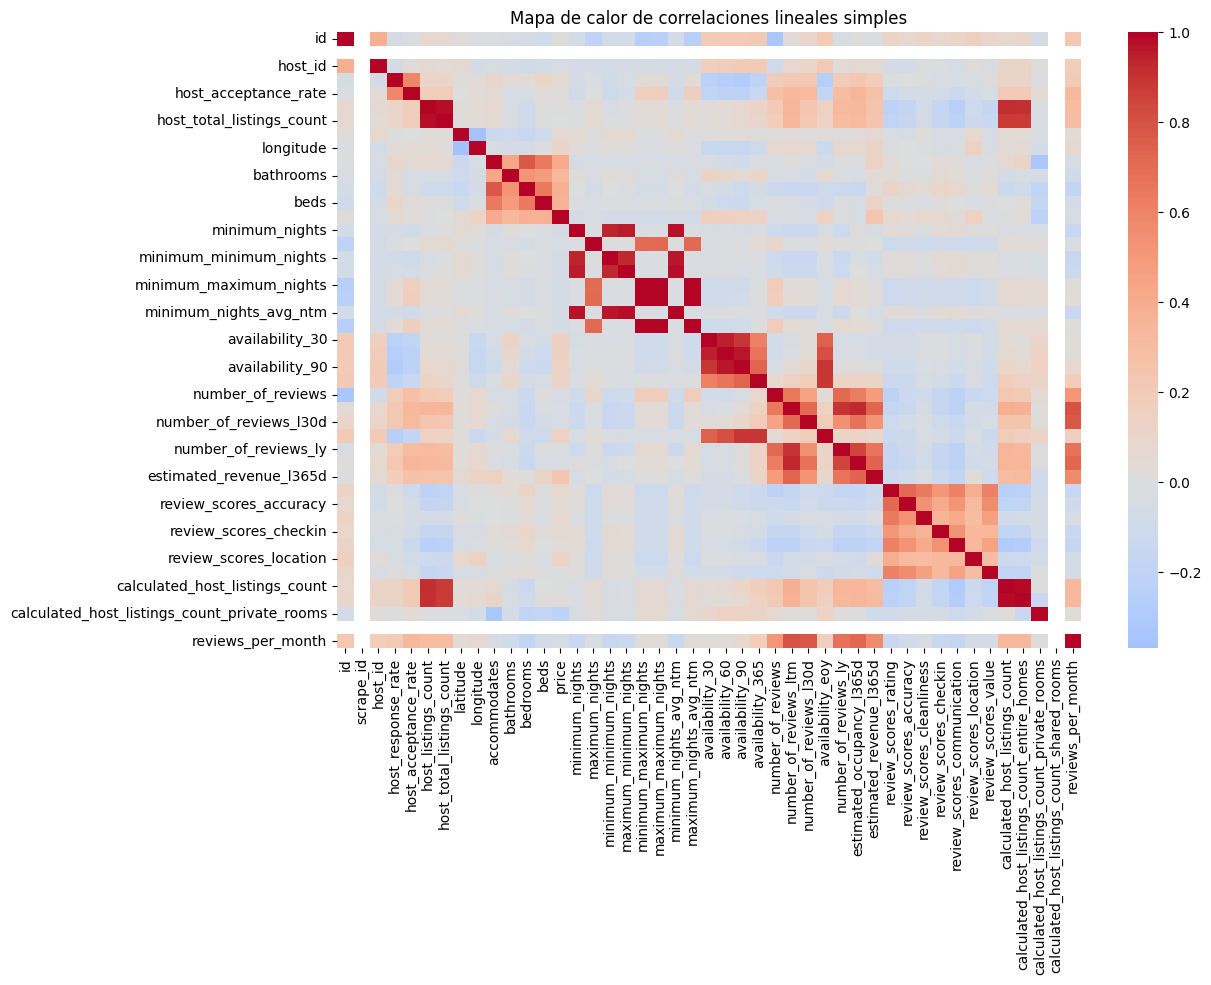

review_scores_rating  \
id                                                        0.121595   
scrape_id                                                      NaN   
host_id                                                  -0.059244   
host_response_rate                                       -0.017930   
host_acceptance_rate                                     -0.101494   
host_listings_count                                      -0.213028   
host_total_listings_count                                -0.197348   
latitude                                                 -0.025508   
longitude                                                -0.008705   
accommodates                                              0.022639   
bathrooms                                                 0.038535   
bedrooms                                                  0.110509   
beds                                                      0.005807   
price                                                     0.078038   
minimum_nights                                            0.024508   
maximum_nights                                           -0.115822   
minimum_minimum_nights                                    0.027740   
maximum_minimum_nights                                    0.026930   
minimum_maximum_nights                                   -0.111791   
maximum_maximum_nights                                   -0.116105   
minimum_nights_avg_ntm                                    0.024436   
maximum_nights_avg_ntm                                   -0.114677   
availability_30                                          -0.058401   
availability_60                                          -0.065968   
availability_90                                          -0.091635   
availability_365                                         -0.121948   
number_of_reviews                                        -0.208948   
number_of_reviews_ltm                                    -0.167725   
number_of_reviews_l30d                                   -0.110518   
availability_eoy                                         -0.125542   
number_of_reviews_ly                                     -0.163954   
estimated_occupancy_l365d                                -0.166940   
estimated_revenue_l365d                                  -0.117992   
review_scores_rating                                      1.000000   
review_scores_accuracy                                    0.715500   
review_scores_cleanliness                                 0.638101   
review_scores_checkin                                     0.512242   
review_scores_communication                               0.611841   
review_scores_location                                    0.392724   
review_scores_value                                       0.611451   
calculated_host_listings_count                           -0.243509   
calculated_host_listings_count_entire_homes              -0.225440   
calculated_host_listings_count_private_rooms             -0.088038   
calculated_host_listings_count_shared_rooms                    NaN   
reviews_per_month                                        -0.137952   

                                              host_acceptance_rate  \
id                                                       -0.028131   
scrape_id                                                      NaN   
host_id                                                   0.028335   
host_response_rate                                        0.580641   
host_acceptance_rate                                      1.000000   
host_listings_count                                       0.177481   
host_total_listings_count                                 0.174220   
latitude                                                 -0.001930   
longitude                                                 0.048567   
accommodates                                              0.051355   
bathrooms                                              

In [24]:
# Mapa de calor de correlaciones simples
plt.figure(figsize=(12,8))
sns.heatmap(df_clean[num_cols].corr(), cmap="coolwarm", center=0)
plt.title("Mapa de calor de correlaciones lineales simples")
plt.show()

# Calculate correlations only between quantitative variables.
# Exclude 'host_is_superhost' from variables_objetivo for correlation calculation
variables_objetivo_numeric = [var for var in variables_objetivo if var in num_cols]

# Calcular correlaciones simples solo entre variables objetivo y el resto
corr_df = df_clean[num_cols].corr()[variables_objetivo_numeric]
display(corr_df)


==================== review_scores_rating ====================


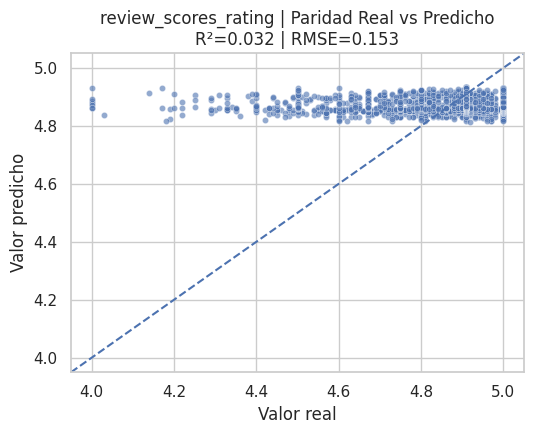

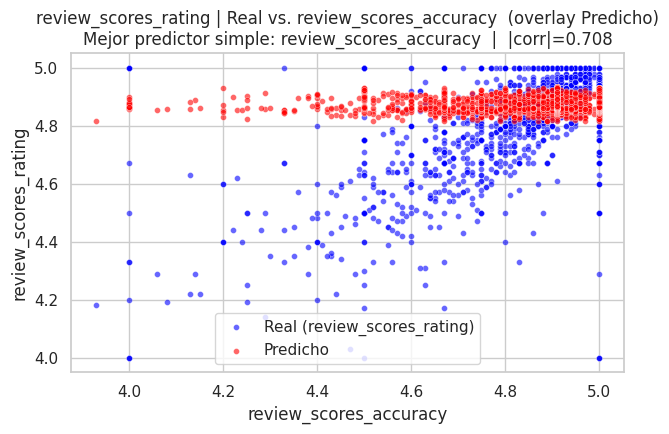

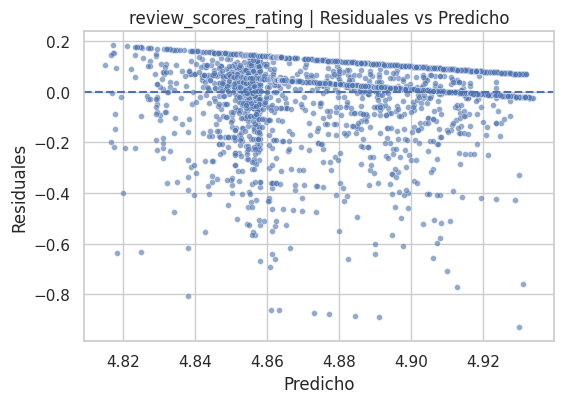


==================== host_acceptance_rate ====================


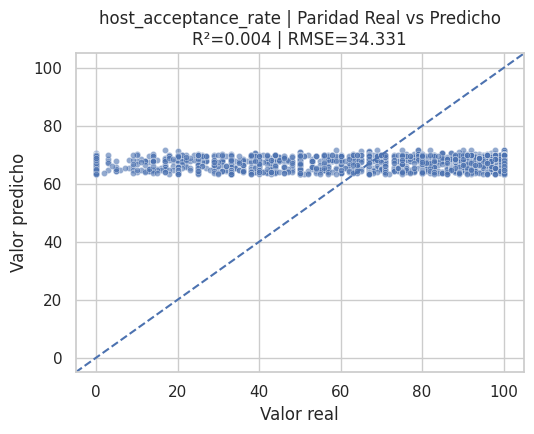

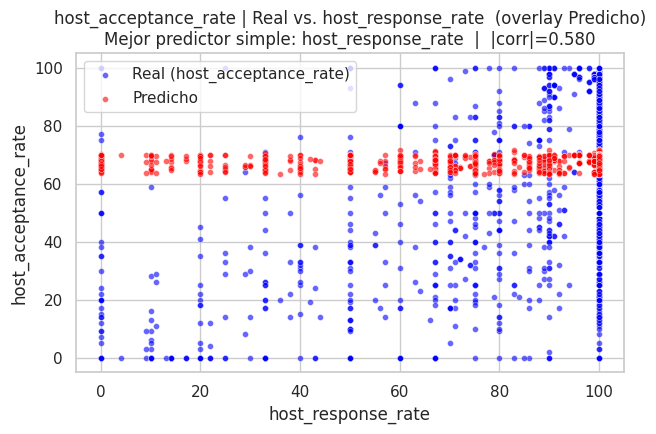

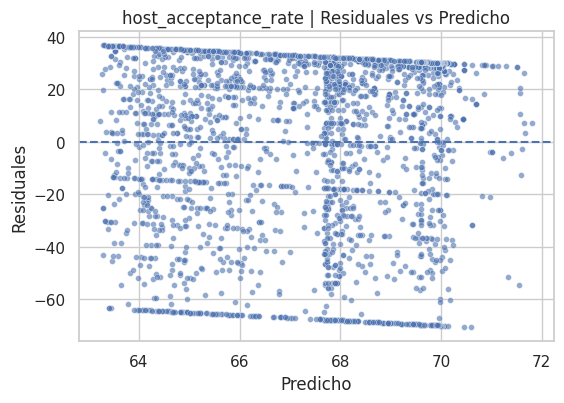


==================== host_is_superhost_num ====================


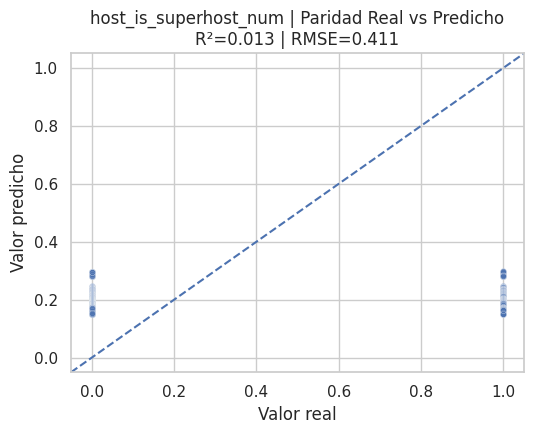

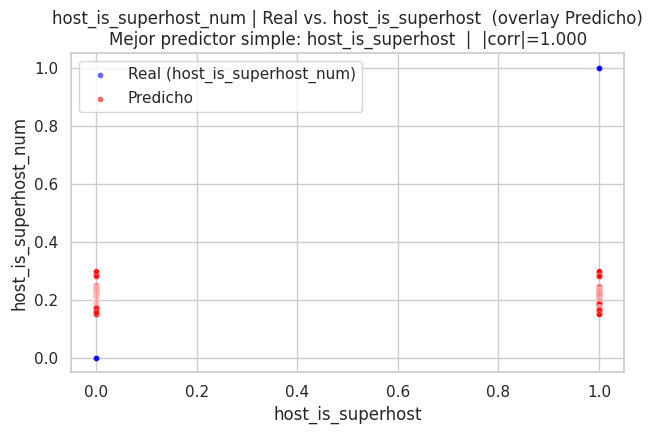

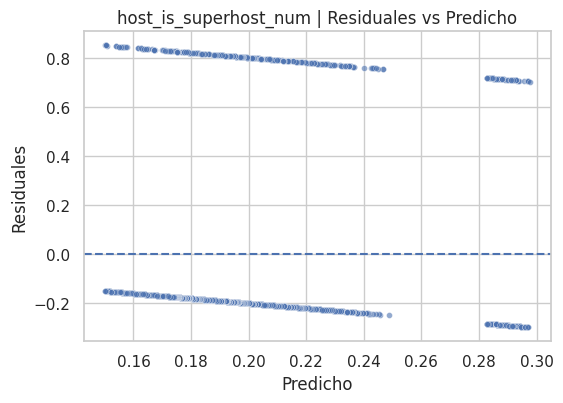


==================== host_total_listings_count ====================


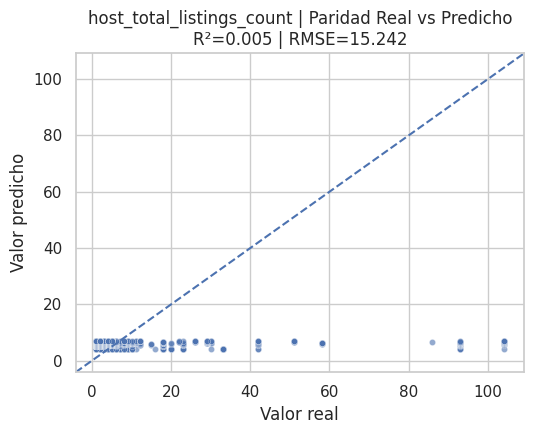

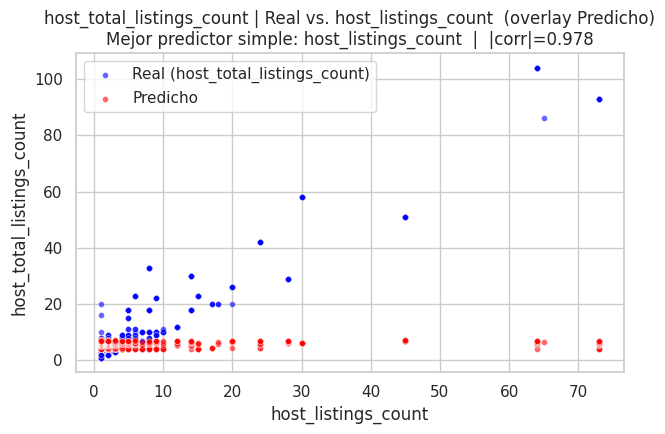

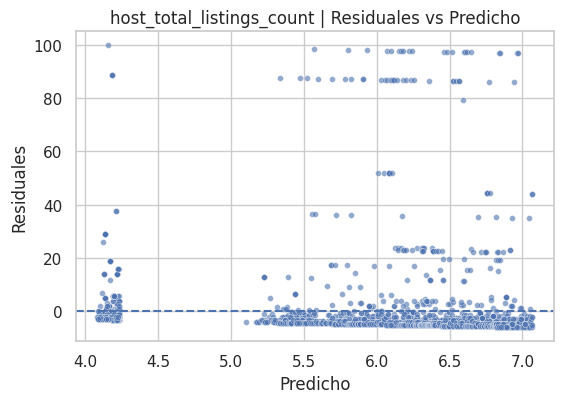


==================== accommodates ====================


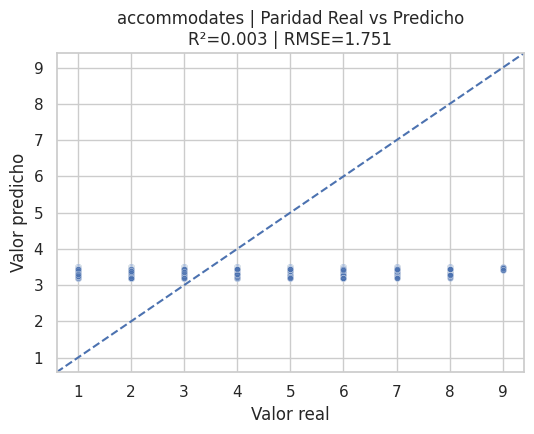

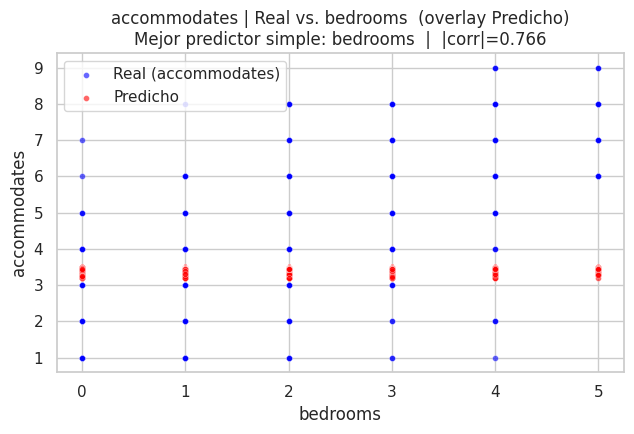

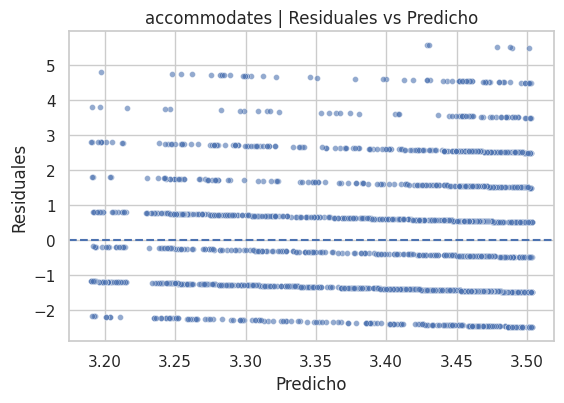


==================== bedrooms ====================


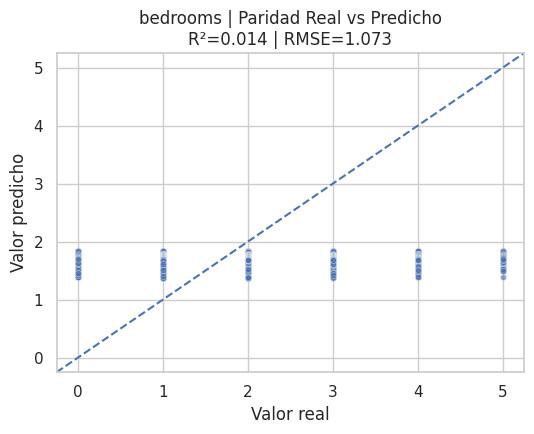

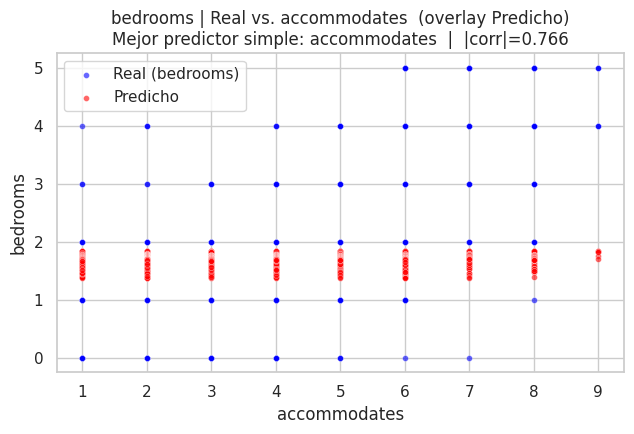

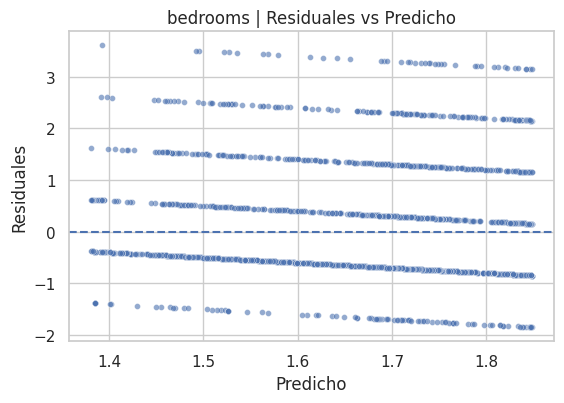


==================== price ====================


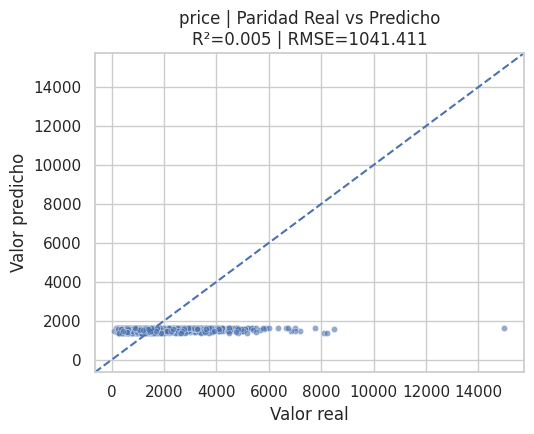

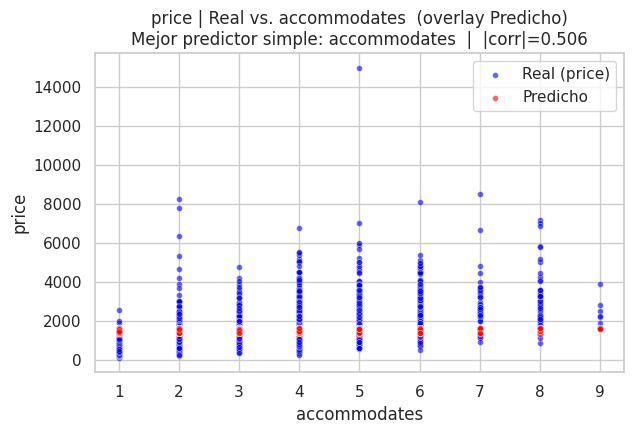

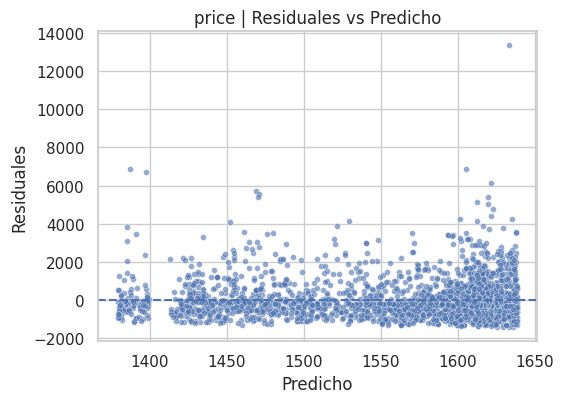


==================== review_scores_value ====================


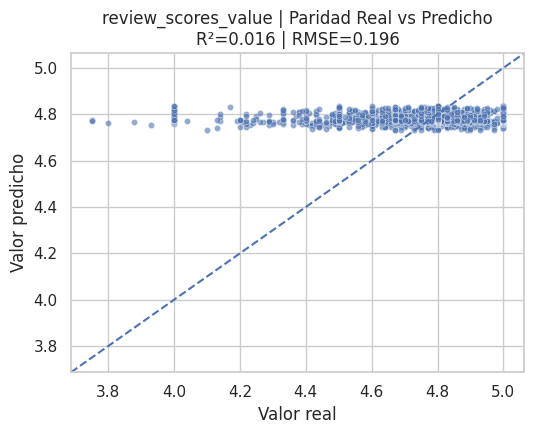

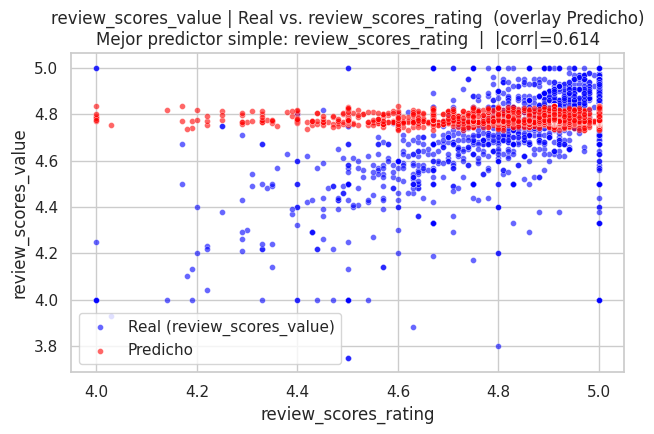

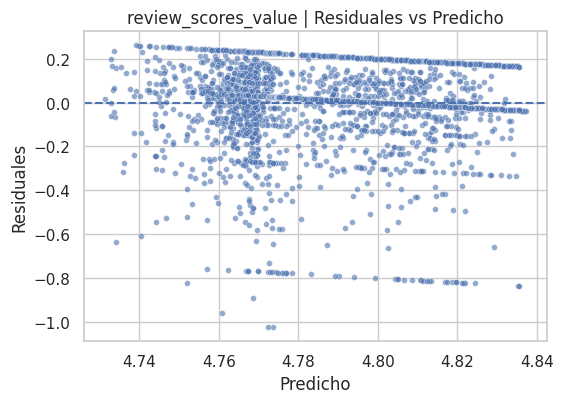


==================== bathrooms ====================


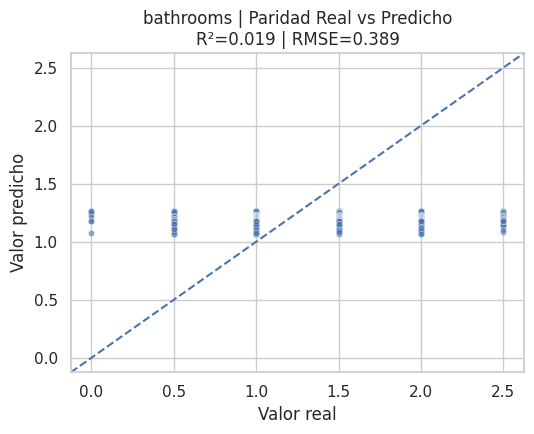

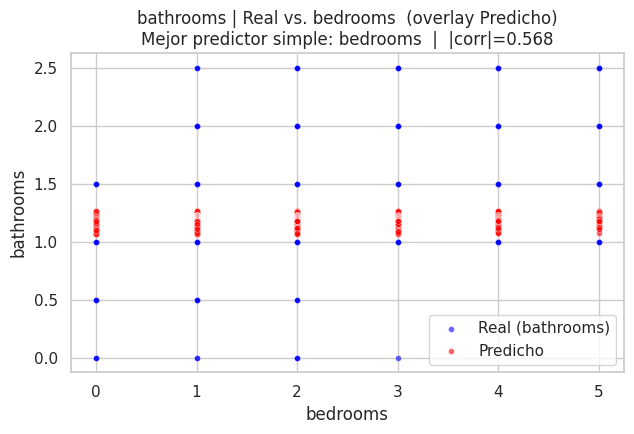

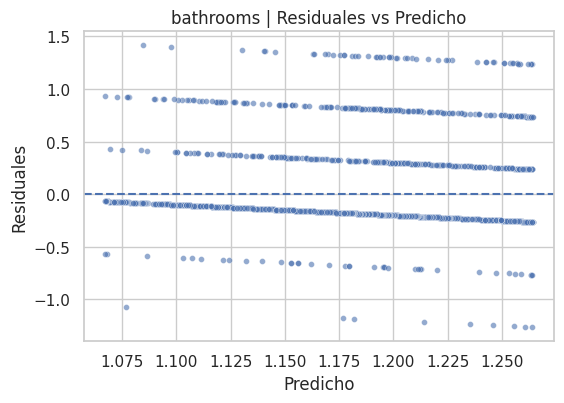


==================== reviews_per_month ====================


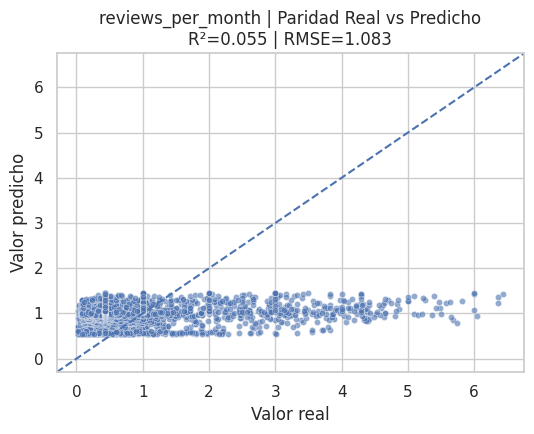

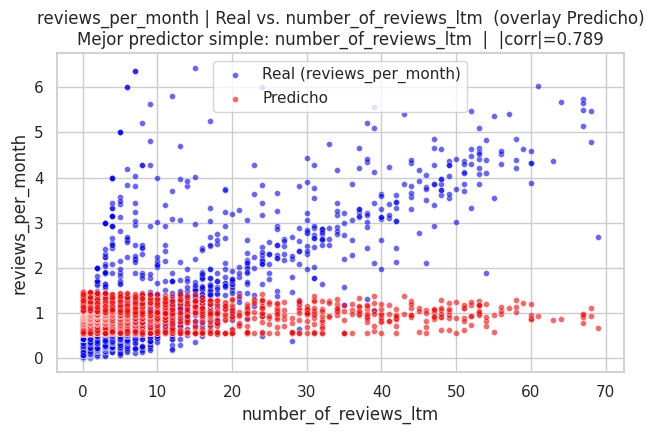

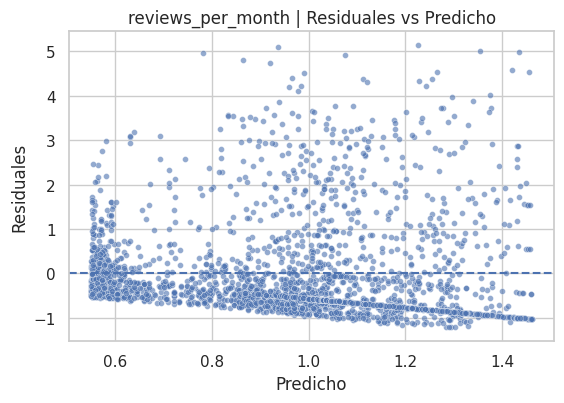

target        R2         RMSE                  best_x  \
9          reviews_per_month  0.055346     1.082706   number_of_reviews_ltm   
0       review_scores_rating  0.032457     0.153098  review_scores_accuracy   
8                  bathrooms  0.019296     0.389230                bedrooms   
7        review_scores_value  0.016071     0.195707    review_scores_rating   
5                   bedrooms  0.014113     1.072666            accommodates   
2      host_is_superhost_num  0.013315     0.410662       host_is_superhost   
6                      price  0.005086  1041.410849            accommodates   
3  host_total_listings_count  0.004659    15.242113     host_listings_count   
1       host_acceptance_rate  0.003558    34.331190      host_response_rate   
4               accommodates  0.002558     1.750714                bedrooms   

   best_x_corr_abs  
9         0.788850  
0         0.707553  
8         0.567616  
7         0.613578  
5         0.765815  
2         1.000000  
6         0.505971  
3         0.978499  
1         0.580156  
4         0.765815

In [26]:
# =========================
# Configuración y helpers
# =========================
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

sns.set_theme(style="whitegrid")

# Asegurar conversión de host_is_superhost a numérico si existe como texto
if "host_is_superhost" in df_clean.columns and not np.issubdtype(df_clean["host_is_superhost"].dtype, np.number):
    _map = {"t":1, "f":0, "True":1, "False":0, True:1, False:0}
    df_clean["host_is_superhost_num"] = df_clean["host_is_superhost"].map(_map).astype("float")
else:
    # Si ya es numérica, úsala tal cual
    if "host_is_superhost" in df_clean.columns:
        df_clean["host_is_superhost_num"] = df_clean["host_is_superhost"].astype(float)

variables_objetivo = [
    "review_scores_rating",
    "host_acceptance_rate",
    "host_is_superhost_num",   # <- usamos la versión numérica
    "host_total_listings_count",
    "accommodates",
    "bedrooms",
    "price",
    "review_scores_value",
    "bathrooms",
    "reviews_per_month"
]

# Filtrar solo columnas numéricas existentes
num_cols = df_clean.select_dtypes(include=[np.number]).columns

# Quitar variables objetivo que no estén en el df
variables_objetivo = [v for v in variables_objetivo if v in df_clean.columns]

def fit_and_plot(target, df_num):
    # X = todas numéricas excepto la target
    X = df_num.drop(columns=[target], errors="ignore")
    y = df_num[target]

    # Unir y limpiar nulos
    data = pd.concat([X, y], axis=1).dropna()
    if data.shape[0] < 20:
        print(f"⚠️ '{target}': muy pocos datos tras dropna ({data.shape[0]} filas). Se omite gráficas.")
        return None

    X = data.drop(columns=[target])
    y = data[target]

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    # Calculate RMSE manually
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    # Elegir mejor predictor (correlación simple más alta en |corr|)
    corrs = pd.concat([X, y], axis=1).corr()[target].drop(target)
    best_x = corrs.abs().idxmax() if corrs.notna().any() else None

    # -----------------
    # 1) Gráfica de paridad (y vs y_pred)
    # -----------------
    plt.figure(figsize=(5.5, 4.5))
    sns.scatterplot(x=y, y=y_pred, s=20, alpha=0.6)
    # Línea 45°
    lims = [
        np.nanmin([plt.gca().get_xlim(), plt.gca().get_ylim()]),
        np.nanmax([plt.gca().get_xlim(), plt.gca().get_ylim()])
    ]
    plt.plot(lims, lims, linestyle="--")
    plt.xlim(lims)
    plt.ylim(lims)
    plt.title(f"{target} | Paridad Real vs Predicho\nR²={r2:.3f} | RMSE={rmse:.3f}")
    plt.xlabel("Valor real")
    plt.ylabel("Valor predicho")
    plt.tight_layout()
    plt.show()

    # -----------------
    # 2) Real vs mejor predictor + Predicho vs mejor predictor
    # -----------------
    if best_x is not None:
        plt.figure(figsize=(6.5, 4.5))
        # Real vs best_x
        sns.scatterplot(x=data[best_x], y=y, color="blue", label=f"Real ({target})", s=18, alpha=0.6)
        # Predicho vs best_x (mismos puntos, overlay)
        sns.scatterplot(x=data[best_x], y=y_pred, color="red", label="Predicho", s=18, alpha=0.6)
        plt.title(f"{target} | Real vs. {best_x}  (overlay Predicho)\nMejor predictor simple: {best_x}  |  |corr|={abs(corrs[best_x]):.3f}")
        plt.xlabel(best_x)
        plt.ylabel(target)
        plt.legend()
        plt.tight_layout()
        plt.show()

    # -----------------
    # 3) Residuales vs predicho
    # -----------------
    residuals = y - y_pred
    plt.figure(figsize=(5.8, 4.2))
    sns.scatterplot(x=y_pred, y=residuals, s=18, alpha=0.6)
    plt.axhline(0, ls="--")
    plt.title(f"{target} | Residuales vs Predicho")
    plt.xlabel("Predicho")
    plt.ylabel("Residuales")
    plt.tight_layout()
    plt.show()

    return {
        "target": target,
        "R2": r2,
        "RMSE": rmse,
        "best_x": best_x,
        "best_x_corr_abs": (abs(corrs[best_x]) if best_x is not None else np.nan),
        "coeficientes": dict(zip(X.columns, model.coef_)),
        "intercepto": model.intercept_
    }

# =========================
# Ejecutar para todas las variables y recopilar métricas
# =========================
resumen = []
for tgt in variables_objetivo:
    print(f"\n==================== {tgt} ====================")
    out = fit_and_plot(tgt, df_clean[num_cols])
    if out is not None:
        resumen.append(out)

# Tabla resumen ordenada por R²
if resumen:
    df_resumen = pd.DataFrame(resumen).sort_values("R2", ascending=False)
    display(df_resumen[["target","R2","RMSE","best_x","best_x_corr_abs"]])